In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%autoreload 2

In [2]:
from dhdrnet.util import DATA_DIR, ROOT_DIR
from dhdrnet.reconstruction import read_stats_from_file

/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


In [24]:
stats_df = pd.read_csv(DATA_DIR/"all_processed"/"fusion_records_snap2.csv")
stats_df.describe()

,mse_-3.5,ssim_-3.5,ms_ssim_-3.5,mse_3.5,ssim_3.5,ms_ssim_3.5,mse_7.0,ssim_7.0,ms_ssim_7.0,mse_-7.0,...,ms_ssim_5.0,mse_-5.0,ssim_-5.0,ms_ssim_-5.0,mse_-2.5,ssim_-2.5,ms_ssim_-2.5,mse_2.5,ssim_2.5,ms_ssim_2.5
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,...,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.000740,0.999930,0.999986,0.000743,0.999930,0.999986,0.000749,0.999929,0.999986,0.000745,...,0.999986,0.000761,0.999928,0.999986,0.000761,0.999928,0.999986,0.000761,0.999929,0.999986
std,0.001174,0.000166,0.000023,0.001205,0.000170,0.000023,0.001221,0.000171,0.000023,0.001227,...,0.000023,0.001203,0.000170,0.000023,0.001190,0.000168,0.000023,0.001182,0.000168,0.000023
min,0.000014,0.996308,0.999461,0.000014,0.996221,0.999445,0.000016,0.996034,0.999417,0.000014,...,0.999494,0.000019,0.996476,0.999484,0.000014,0.996087,0.999425,0.000014,0.996129,0.999432
25%,0.000175,0.999926,0.999982,0.000174,0.999925,0.999982,0.000175,0.999925,0.999982,0.000174,...,0.999982,0.000186,0.999926,0.999982,0.000187,0.999924,0.999982,0.000190,0.999924,0.999982
50%,0.000422,0.999982,0.999992,0.000417,0.999982,0.999992,0.000423,0.999981,0.999992,0.000423,...,0.999992,0.000436,0.999982,0.999992,0.000436,0.999981,0.999992,0.000435,0.999981,0.999992
75%,0.000931,0.999997,0.999997,0.000941,0.999997,0.999997,0.000940,0.999997,0.999997,0.000939,...,0.999997,0.000952,0.999997,0.999997,0.000961,0.999997,0.999997,0.000963,0.999997,0.999997
max,0.027954,1.000000,1.000000,0.028633,1.000000,1.000000,0.030011,1.000000,1.000000,0.030076,...,1.000000,0.026718,1.000000,1.000000,0.029615,1.000000,1.000000,0.029322,1.000000,1.000000


In [25]:
ev_categories = {ev_max:np.linspace(-ev_max,ev_max,5) for ev_max in range(4,8)}
ev_categories

{4: array([-4., -2.,  0.,  2.,  4.]),
 5: array([-5. , -2.5,  0. ,  2.5,  5. ]),
 6: array([-6., -3.,  0.,  3.,  6.]),
 7: array([-7. , -3.5,  0. ,  3.5,  7. ])}

In [26]:
grouped_stats = dict()
from dhdrnet.util import flatten
for cat, ev_stops in ev_categories.items():
    selected_cols = list(flatten([[c for c in stats_df.columns if c.endswith(f"_{ev}")] for ev in ev_stops]))
    grouped_stats[cat] = stats_df.loc[:,["name",*selected_cols]]

grouped_stats

{4:                           name  mse_-4.0  ssim_-4.0  ms_ssim_-4.0  mse_-2.0  \
 0     0127_20161018_111029_303  0.000090   0.999999      0.999999  0.000126   
 1     6G7M_20150321_124944_821  0.002904   0.999595      0.999945  0.002429   
 2     0037_20160717_132116_222  0.000433   0.999982      0.999989  0.000429   
 3     33TJ_20150820_180403_156  0.001125   0.999874      0.999982  0.001121   
 4     33TJ_20150613_094235_247  0.000128   0.999998      0.999998  0.000127   
 ...                        ...       ...        ...           ...       ...   
 3229  0094_20150411_151345_904  0.000114   0.999999      0.999998  0.000101   
 3230  33TJ_20150613_091501_684  0.000151   0.999998      0.999997  0.000216   
 3231  4KK2_20150818_172058_316  0.000360   0.999988      0.999993  0.000514   
 3232  0006_20160721_190959_035  0.000430   0.999976      0.999993  0.000706   
 3233  4KK2_20150906_125359_376  0.000385   0.999978      0.999993  0.000430   
 
       ssim_-2.0  ms_ssim_-2.0   ms

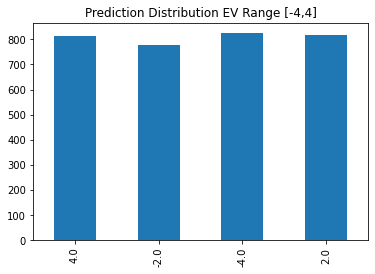

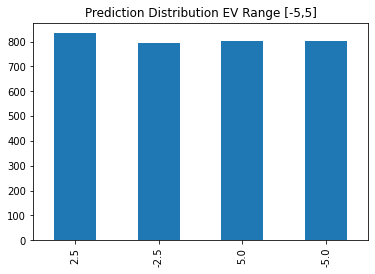

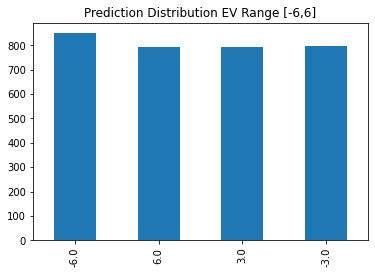

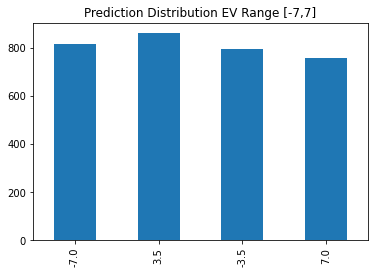

In [49]:
for ev, stats in grouped_stats.items():
    mse_stats = stats.loc[
        :, ["name", *[c for c in stats.columns if c.startswith("mse")]]
    ]
    mse_stats = mse_stats.rename(lambda c: c.split("_")[-1], axis="columns")
    mse_stats["optimal_mse"] = (
        mse_stats.loc[:, f"-{ev}.0":f"{ev}.0"].idxmin(axis=1).apply(float)                                                                                     
    )
    plt.figure()
    ax = mse_stats["optimal_mse"].value_counts(sort=False).plot(
        kind="bar",  title=f"Prediction Distribution EV Range [-{ev},{ev}]" 
    )
    ax.set_xlabel = "EV Choices"
    ax.set_ylabel = "Frequency"
    plt.savefig(f"distribution_ev{ev}")
    plt.show() 

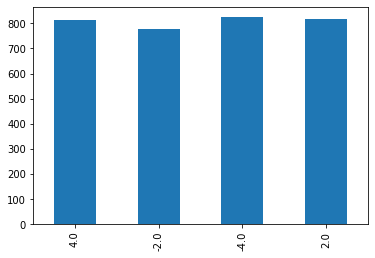

In [38]:
plt.figure()
opt_view = stats_df[["name", *[c for c in stats_df.columns if c.startswith("optimal")]]]
opt_view["optimal_mse_4"].value_counts(sort=False).plot(kind="bar",title="Prediction Distribution EV Range [-{}]")
plt.show()

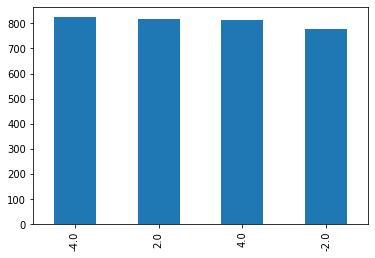

In [96]:
mse_stats["optimal_mse"].value_counts().plot(kind='bar')

(array([   1.,    0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.,    2.,    1.,    6.,    4.,
           6.,   15.,    8.,   10.,   17.,   20.,   26.,   28.,   37.,
          45.,   41.,   52.,   80.,   79.,  102.,  123.,  111.,  150.,
         143.,  153.,  187.,  155.,  192.,  227.,  221.,  255.,  268.,
         235.,  323.,  262.,  323.,  333.,  369.,  319.,  349.,  332.,
         344.,  327.,  322.,  279.,  265.,  297.,  252.,  218.,  235.,
         235.,  167.,  181.,  175.,  139.,  130.,  112.,  119.,   84.,
          78.,   52.,   59.,   47.,   49.,   47.,   22.,   25.,   23.,
          27.,   22.,   11.,    8.,    6.,    7.,    5.,    2.,    4.,
           2.,    2.,    2.,    2.,    0.,    0.,    0.,    0.,    1.,    2.]),
 array([-4.28708288, -4.20490145, -4.12272001, -4.04053858, -3.95835714,
        -3.8761757 , -3.79399427, -3.71181283, -3.6296314 , -3.54744996,
        -3.46526853, -3.38308709, -3.30090566, -3.21872422, -3.1

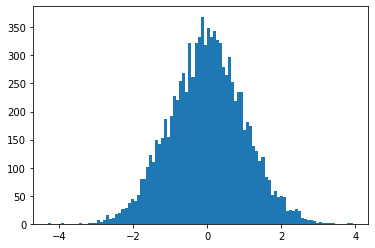

In [62]:
x = np.random.standard_normal(10000)
plt.hist(x,bins=100)
# mean = 0; std = 1; variance = np.square(std)
# x = np.arange(-5,5,.01)
# f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

# plt.plot(x,f)
# plt.ylabel('gaussian distribution')
# plt.show()